In [58]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import warnings
warnings.filterwarnings('ignore')

<font color=red size=5>Load Data</font>

In [59]:
folder_path = "C:\\Users\\Pro\\Desktop\\ML_project"
files = os.listdir(folder_path)
datasets = {}
for file in files:
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        dataset_name = os.path.splitext(file)[0]
        datasets[dataset_name] = df


In [60]:
genome_scores = datasets['genome_scores']
genome_tags= datasets['genome_tags']
link=datasets['link']
movie = datasets['movie']
rating = datasets['rating']
tag=datasets['tag']


<font color=red size=5>Data Exploration</font>

In [61]:
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [62]:
duplicate = movie.duplicated(subset=['movieId', 'title']).sum()# check for duplicate rows
duplicate

0

In [63]:
def dataexp(data):
    duplicate = data.duplicated().sum()# check for duplicate rows
    missing_values_total = data.isnull().sum()#missing values
    print('missig values :',missing_values_total)
    print('\n')
    print('duplicte: ', duplicate)
    print('\n')
    print('types :',data.dtypes)
    

In [64]:
missing_values_total = movie.isnull().sum()#missing values
missing_values_total

movieId    0
title      0
genres     0
dtype: int64

In [65]:
rating 

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [66]:
dataexp(rating)     

missig values : userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


duplicte:  0


types : userId         int64
movieId        int64
rating       float64
timestamp     object
dtype: object


<font color= blue size =2>Recommendations of movies based on high average ratings and the number of rating by users </font>

In [67]:
movie_ppl= rating.groupby('movieId').agg({'rating': ['mean', 'count']})#groupe by movieid and aggregte rating by mean and count
movie_ppl.columns = ['average_rating', 'num_ratings']

In [68]:
movie_ppl

,average_rating,num_ratings
movieId,,
1,3.921240,49695
2,3.211977,22243
3,3.151040,12735
4,2.861393,2756
5,3.064592,12161
...,...,...
131254,4.000000,1
131256,4.000000,1
131258,2.500000,1


In [69]:
sorted_movie_ppl = movie_ppl.sort_values(by=['num_ratings', 'average_rating'], ascending=False)#sort by number of rating and avr rating
sorted_movie_ppl

,average_rating,num_ratings
movieId,,
296,4.174231,67310
356,4.029000,66172
318,4.446990,63366
593,4.177057,63299
480,3.664741,59715
...,...,...
130672,0.500000,1
130682,0.500000,1
130900,0.500000,1


In [70]:
top_10= sorted_movie_ppl.head(10).index.get_level_values('movieId')
print(top_10)

Int64Index([296, 356, 318, 593, 480, 260, 110, 589, 2571, 527], dtype='int64', name='movieId')


In [71]:
top_10_names=movie.loc[top_10,'title'].tolist()# obtain the names of top movies
print('top 10 movies of all time :')
for movie_name in top_10_names:
    print('\t',movie_name)

top 10 movies of all time :
	 Priest (1994)
	 I Love Trouble (1994)
	 Strawberry and Chocolate (Fresa y chocolate) (1993)
	 Wild Bunch, The (1969)
	 Lassie (1994)
	 Ladybird Ladybird (1994)
	 Rumble in the Bronx (Hont faan kui) (1995)
	 Beauty and the Beast (1991)
	 Rocky Horror Picture Show, The (1975)
	 Secret Garden, The (1993)


## Content-based filtering using movies 

In [72]:
g= movie['genres']#find unique genrs
listt=[]
for i in g :
    l=i.split('|')
    for m in l :
        if m not in listt:
            listt.append(m)
#make to every unique genre column and assign 1 if the movie is of that genre
for i, j in zip(g, range(len(g))):
    l=i.split('|')
    for m in l : 
        movie.loc[j, m]=1

In [73]:
movie_df=movie.fillna(0)#fill nan by 0
movie_df=movie_df.drop(columns='genres')
movie_df

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27274,131256,"Feuer, Eis & Dosenbier (2002)",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27275,131258,The Pirates (2014),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27276,131260,Rentun Ruusu (2001),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [74]:
genre_counts = movie_df.iloc[:, 2:].sum() # count how many movies of each genre
genre_counts = pd.to_numeric(genre_counts, errors='coerce')


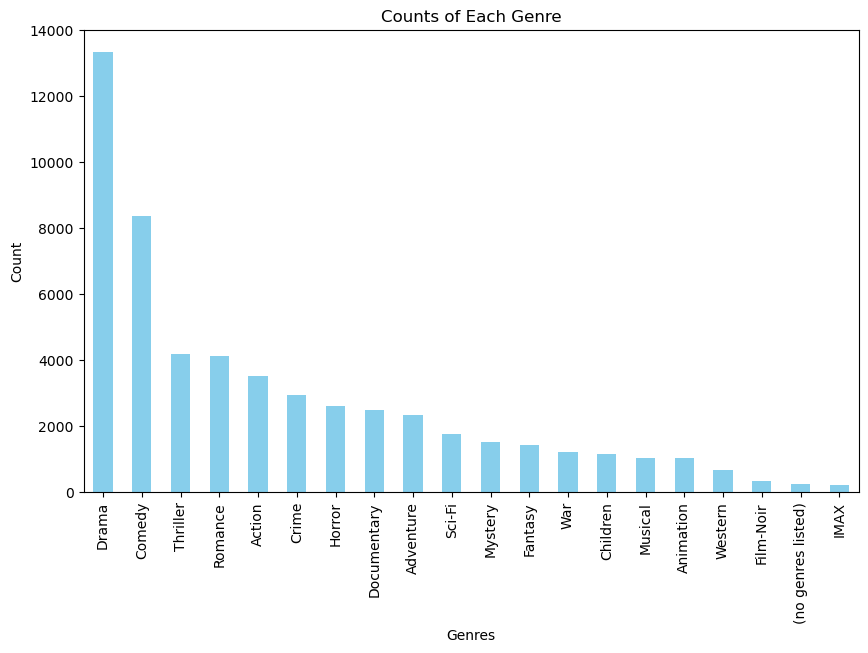

In [75]:
plt.figure(figsize=(10, 6))
genre_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Counts of Each Genre')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()

#### recommend movies based on a spf genre of movies

In [76]:
def rec_genres(data, genre):
    genre_movies = data[data[genre] == 1]
    for title in genre_movies['title'].head(10):
        print(title)


In [77]:
rec_genres(movie_df, 'Children') # movies that are for childrens


Toy Story (1995)
Jumanji (1995)
Tom and Huck (1995)
Balto (1995)
Now and Then (1995)
Babe (1995)
It Takes Two (1995)
Pocahontas (1995)
Big Green, The (1995)
Kids of the Round Table (1995)


In [78]:
movie_df

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27274,131256,"Feuer, Eis & Dosenbier (2002)",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27275,131258,The Pirates (2014),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27276,131260,Rentun Ruusu (2001),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## using knn to recommend movies with the same geners

In [79]:
from sklearn.neighbors import NearestNeighbors 
import random

X = movie_df.iloc[:, 2:] # X is data with only geners
X.shape

(27278, 20)

In [80]:
knn_model = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn_model.fit(X)

NearestNeighbors(metric='euclidean')

In [81]:
movie_ids = list(movie_df.movieId)# list of movies ids 
movie_id = random.choice(movie_ids)# choose a rondam id of movie
movie_index = movie_df.index[movie_df['movieId'] == movie_id].tolist()[0]# searsh index of the chosen movieid in data
movie_index,movie_id

(20218, 99502)

In [82]:
movie_features = X.loc[movie_index, :].values.reshape(1, -1)
movie_features

array([[0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [83]:
distances, indices = knn_model.kneighbors(movie_features)
distances,indices

(array([[0., 0., 0., 0., 0.]]), array([[81, 74, 71, 94, 83]], dtype=int64))

In [84]:
recommended_movie_ids = movie_df.iloc[indices[0], 0]
list(recommended_movie_ids)
recomm=movie_df.loc[list(recommended_movie_ids),'title']
print(f'Recommended Movies for "{movie_df.loc[movie_index, "title"]}" are :\n  {list(recomm)}')

Recommended Movies for "Remember the Daze (Beautiful Ordinary, The) (2007)" are :
  ['Once Upon a Time... When We Were Colored (1995)', 'Screamers (1995)', 'Misérables, Les (1995)', 'Shopping (1994)', 'Angels and Insects (1995)']


In [85]:
from sklearn.neighbors import NearestNeighbors 
import random

X = movie_df.iloc[:, 2:] # X is data with only geners

knn_model = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn_model.fit(X)

movie_ids = list(movie_df.movieId)# list of movies ids 
movie_id = random.choice(movie_ids)# choose a rondam id of movie

movie_index = movie_df.index[movie_df['movieId'] == movie_id].tolist()[0]# searsh index of the chosen movie in data

movie_features = X.loc[movie_index, :].values.reshape(1, -1)

distances, indices = knn_model.kneighbors(movie_features)
recommended_movie_ids = movie_df.iloc[indices[0], 0]
list(recommended_movie_ids)

recomm=movie_df.loc[list(recommended_movie_ids),'title']
print(f'Recommended Movies for "{movie_df.loc[movie_index, "title"]}" are : ')
for i in  list(recomm):
         print(i)

Recommended Movies for "Chronicle of a Disappearance (1996)" are : 
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
Now and Then (1995)
Cutthroat Island (1995)
Mortal Kombat (1995)
Richard III (1995)


In [86]:
indices

array([[30, 25, 13, 42, 39]], dtype=int64)

In [87]:
neighbor_indices = indices[0][1:].reshape(1, -1)
neighbor_distances = distances[0][1:].reshape(1, -1)

In [88]:
neighbor_indices

array([[25, 13, 42, 39]], dtype=int64)

In [89]:
neighbor_distances

array([[0., 0., 0., 0.]])

## Collaborative Filtering using knn

In [113]:
movie__df=movie.iloc[:,0:2]
rating_df=rating.iloc[:,0:3]
data = pd.merge(movie__df,rating_df)


In [114]:
data

,movieId,title,userId,rating
0,1,Toy Story (1995),3,4.0
1,1,Toy Story (1995),6,5.0
2,1,Toy Story (1995),8,4.0
3,1,Toy Story (1995),10,4.0
4,1,Toy Story (1995),11,4.5
...,...,...,...,...
20000258,131254,Kein Bund für's Leben (2007),79570,4.0
20000259,131256,"Feuer, Eis & Dosenbier (2002)",79570,4.0
20000260,131258,The Pirates (2014),28906,2.5
20000261,131260,Rentun Ruusu (2001),65409,3.0


In [92]:
data = data.iloc[:1000000,:]
pivot_table = pd.pivot_table(data,index="userId", columns="title", values="rating")
pivot_table=pivot_table.fillna(0)

In [93]:
pivot_table

title,Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),"Amazing Panda Adventure, The (1995)","American President, The (1995)",Angela (1995),Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),Assassins (1995),Babe (1995),...,Unforgettable (1996),Up Close and Personal (1996),"Usual Suspects, The (1995)",Vampire in Brooklyn (1995),Waiting to Exhale (1995),When Night Is Falling (1995),"White Balloon, The (Badkonake sefid) (1995)",White Squall (1996),Wings of Courage (1995),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138490,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
pivot_table = pd.pivot_table(data,index="userId", columns="title", values="rating")
pivot_table=pivot_table.fillna(0)

ratings_matrix_array = pivot_table.values
target_user_id = 6
ratings_matrix_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.]])

In [95]:
target_user_ratings = ratings_matrix_array[target_user_id, :].reshape(1, -1)# user target rating 
target_user_ratings 

array([[0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 2., 0., 0., 0., 2., 0., 0., 0., 3., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0.,
        0., 0., 0., 3., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [96]:
knn = NearestNeighbors(n_neighbors=5, metric='cosine', algorithm='brute') # knn model
knn.fit(ratings_matrix_array)

NearestNeighbors(algorithm='brute', metric='cosine')

In [97]:
distances, indices = knn.kneighbors(target_user_ratings)
neighbor_indices = indices[0][1:].reshape(1, -1)
neighbor_distances = distances[0][1:].reshape(1, -1)
for i in range(neighbor_indices.shape[1]):
    print(f'user {target_user_id} has a neighbor : {neighbor_indices[0][i]} far by a distance of: {neighbor_distances[0][i]}')

user 6 has a neighbor : 16039 far by a distance of: 0.25946836882264535
user 6 has a neighbor : 92570 far by a distance of: 0.32352941176470584
user 6 has a neighbor : 28668 far by a distance of: 0.32740846071498997
user 6 has a neighbor : 83289 far by a distance of: 0.33041051999302473


In [98]:
predicted_ratings = np.mean(ratings_matrix_array[neighbor_indices], axis=1)# mean of rating of neighbors by axis = 1 ( columns)
print('predicted rating of movies for our user \n:',predicted_ratings)

predicted rating of movies for our user 
: [[0.    0.    0.    3.625 0.    1.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.625 0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.75  0.
  0.    3.5   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    2.75  0.    3.125 0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.   ]]


In [99]:
watched_movie_indices = np.where(ratings_matrix_array[target_user_id] > 0)[0]# this code bach nhydo movies already watched by our user
p=predicted_ratings.flatten()
p[watched_movie_indices] = 0
p

array([0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  ])

In [100]:
sorted_movie_indices = np.argsort(p)[::-1]
sorted_movie_indices

array([  5,  58, 145,  45,  51,  50,  49,  48,  47,  46,  44,  53,  43,
        42,  41,  40,  39,  38,  52,  55,  54,  64,  70,  69,  68,  67,
        66,  65,  63,  36,  62,  61,  60,  59,  57,  56,  37,  35, 144,
         9,  15,  14,  13,  12,  11,  10,   8,  17,   7,   6,   4,   3,
         2,   1,  16,  18,  34,  27,  33,  32,  31,  30,  29,  28,  26,
        19,  25,  24,  23,  22,  21,  20,  71,  72,  73,  74, 125, 124,
       123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111,
       126, 127, 128, 137, 143, 142, 141, 140, 139, 138, 136, 129, 135,
       134, 133, 132, 131, 130, 110, 109, 108,  82,  88,  87,  86,  85,
        84,  83,  81,  90,  80,  79,  78,  77,  76,  75,  89,  91, 107,
       100, 106, 105, 104, 103, 102, 101,  99,  92,  98,  97,  96,  95,
        94,  93,   0], dtype=int64)

In [101]:
top_recommendations = pivot_table.columns[sorted_movie_indices]
print(f'Top recommended movies for the target user {target_user_id} are:')
for i in range(5):
    print(top_recommendations[i])


Top recommended movies for the target user 6 are:
Angels and Insects (1995)
Get Shorty (1995)
Young Poisoner's Handbook, The (1995)
Dracula: Dead and Loving It (1995)
Four Rooms (1995)


In [115]:

def recom_userneighbors(pivot_table,target_user_id,n,movies_n): # fonction to do all
    ratings_matrix_array = pivot_table.values
    
    target_user_ratings = ratings_matrix_array[target_user_id, :].reshape(1, -1)
    knn = NearestNeighbors(n_neighbors=n+1, metric='cosine', algorithm='brute')
    knn.fit(ratings_matrix_array)

    distances, indices = knn.kneighbors(target_user_ratings)
    neighbor_indices = indices[0][1:].reshape(1, -1)
    neighbor_distances = distances[0][1:].reshape(1, -1)

    predicted_ratings = np.mean(ratings_matrix_array[neighbor_indices], axis=1)

    watched_movie_indices = np.where(ratings_matrix_array[target_user_id] > 0)[0]

    p=predicted_ratings.flatten()
    p[watched_movie_indices] = 0

    sorted_movie_indices = np.argsort(p)[::-1]
    top_recommendations = pivot_table.columns[sorted_movie_indices]
    for i in range(neighbor_indices.shape[1]):
          print(f'user {target_user_id} has a neighbor : {neighbor_indices[0][i]} far by a distance of: {neighbor_distances[0][i]}')
    print(f'Top {movies_n} recommended movies for the target user {target_user_id} are:')
    for i in range(movies_n):
         print(top_recommendations[i])

In [117]:
user_id = list(pivot_table.index)# list of  ids 
target_user_id = random.choice(user_id)# choose a rondam id of user

recom_userneighbors(pivot_table,target_user_id,n=5,movies_n=10)


user 22902 has a neighbor : 56231 far by a distance of: 0.2671858526299895
user 22902 has a neighbor : 83375 far by a distance of: 0.26729081819726097
user 22902 has a neighbor : 61350 far by a distance of: 0.26843647904971
user 22902 has a neighbor : 51853 far by a distance of: 0.26843647904971
user 22902 has a neighbor : 118801 far by a distance of: 0.26843647904971024
Top 10 recommended movies for the target user 22902 are:
Young Poisoner's Handbook, The (1995)
Copycat (1995)
Frankie Starlight (1995)
Four Rooms (1995)
Flirting With Disaster (1996)
Father of the Bride Part II (1995)
Fair Game (1995)
Eye for an Eye (1996)
Dunston Checks In (1996)
Dracula: Dead and Loving It (1995)
